In [278]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
# plt.rcParams['font.sans-serif'] = ['simhei'] # 显示中文字符
plt.rcParams['font.serif'] = ['simsun'] # 显示中文字符（宋体）
plt.rcParams['axes.facecolor'] = 'white'
font1 = {'weight' : 'normal','size': 25}
font2 = {'weight' : 'normal','size': 25}
mpl.style.use('ggplot')

# 原始数据可视化

In [279]:
train_FD001_path = r'../data/train_FD001.txt'
train_data = pd.read_csv(train_FD001_path,sep=" ", header=None)
train_data.drop(train_data.columns[[26, 27]], axis=1, inplace=True) #这两列为空，删除
train_data.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
# train_data.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 'f1', 'f2', 'f3',
#                      'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14',
#                      'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21']

In [280]:
train_data

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


对于id为1的燃机，从全生命周期s3的数据为

In [281]:
train_data.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [282]:
gt1 = train_data[train_data["id"] == 1]

In [283]:
gt1

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [284]:
x = gt1_cycle = gt1.cycle.values

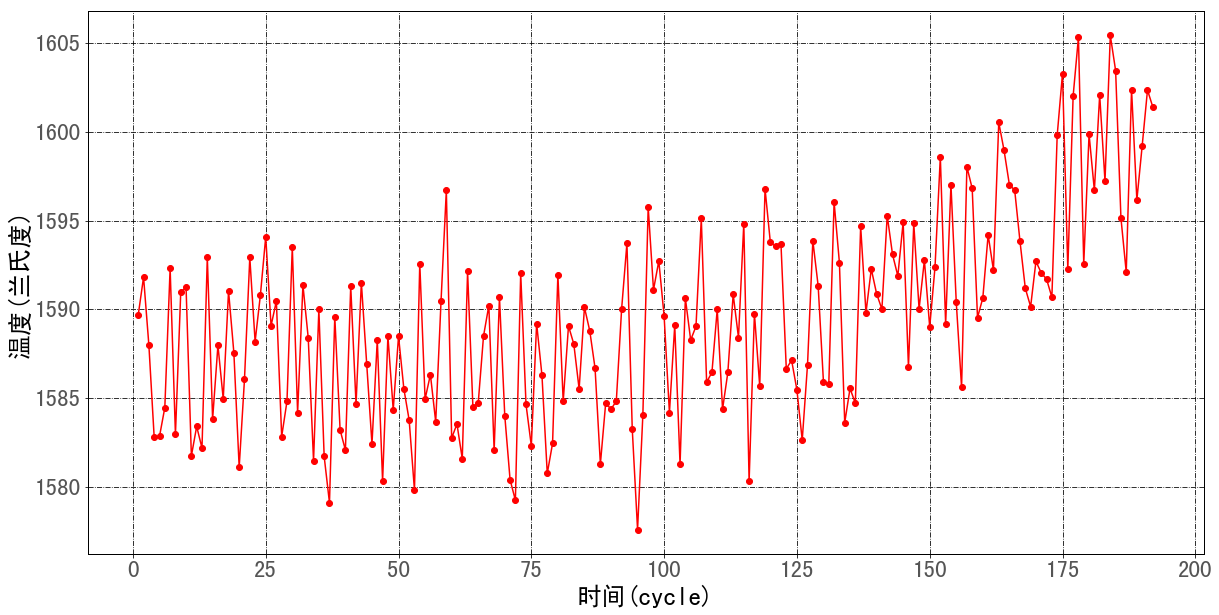

In [295]:
s3 = gt1_s3 = gt1.s3.values
plt.figure(figsize=(20,10))
plt.plot(x, s3, 'o-', color='red', label='labels')
plt.rcParams['axes.facecolor'] = 'white'
# plt.legend(prop=font2)
plt.tick_params(labelsize=23, color='black')

ax = plt.gca()
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

plt.xlabel("时间(cycle)", font2, color='black')
plt.ylabel("温度(兰氏度)", font2, color='black')
figname = "高压压气机出口总温度全生命周期变化"
# plt.title(figname)
plt.grid(linestyle='-.', c='black')
plt.show()

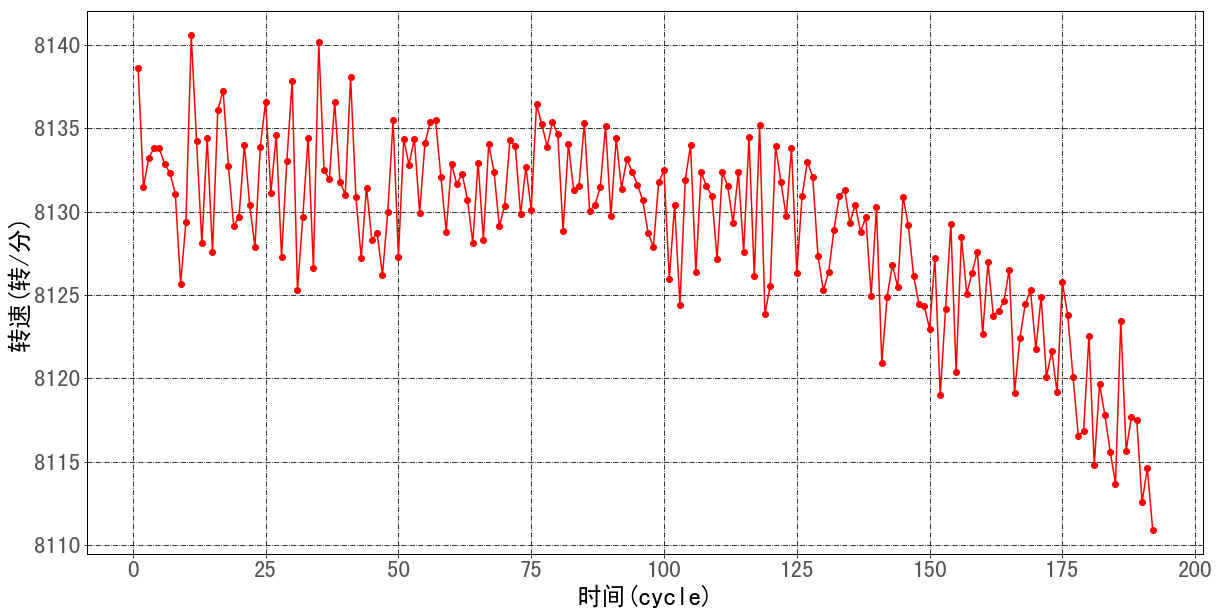

In [286]:
s14 = gt1_s14 = gt1.s14.values
plt.figure(figsize=(20,10))
plt.plot(x, s14, 'o-', color='red', label='labels')

plt.rcParams['axes.facecolor'] = 'white'
# plt.legend(prop=font2)
plt.tick_params(labelsize=23, color='black')
plt.xlabel("时间(cycle)",font2, color='black')
plt.ylabel("转速(转/分)", font2, color='black')
figname = "核心机换算转速全生命周期变化"
plt.grid(linestyle='-.', c='black')

#使用plt.gca获取当前坐标轴信息get current axis. 使用.spines设置边框：右侧边框；使用.set_color设置边框颜色：默认白色； 使用.spines设置边框：上边框；使用.set_color设置边框颜色：默认白色；
ax = plt.gca()
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


plt.show()
# plt.title(figname)

In [287]:
def feature_extraction(series_data, window_width=100, steps=10):
    # series_data is input
    # series_data = np.array(traindata_0_F[0].iloc[:,0])

    # sliding window
    window_width = 10000
    t_start = 0
    windows = []
   
    while t_start+window_width <= len(series_data):
        windows.append(series_data[t_start:t_start+window_width])
        t_start += steps
    windows_num = len(windows)
    windows = np.array(windows)
    #print("windows.shape: {},t_start: {}".format(windows.shape, t_start))

    f1 = []
    f2 = []
    f3 = []
    f4 = []
    f5 = []
    f6 = []
    f7 = []
    f8 = []
    f9 = []
    f10 = []
    f11 = []
    for i in range(windows_num):
        temp = windows[i]
        data_max = np.max(temp)
        data_min = np.min(temp)
        # 时域特征
        f1_temp = data_max - data_min
        f1.append(f1_temp)
        f2_temp = np.sqrt(np.mean(temp ** 2))
        f2.append(f2_temp)
        f3_temp = f2_temp / abs(np.mean(temp))
        f3.append(f3_temp)
        f4_temp = data_max / abs(np.mean(temp))
        f4.append(f4_temp)
        f5_temp = np.mean((abs(temp) - np.mean(temp)) ** 4) / (f2_temp ** 4)
        f5.append(f5_temp)
        f6_temp = data_max / f2_temp
        f6.append(f6_temp)
        f7_temp = f2_temp / np.mean(temp)
        f7.append(f7_temp)
        # 频域特征
        '''
        f8_temp = np.sum(temp * temp) / (2 * np.pi * np.sum(temp ** 2)) #分子不对
        f8.append(f8_temp)
        f9_temp = np.sum(temp ** 2) / (4 * (np.pi ** 2) * np.sum(temp ** 2)) #分子不对
        f9.append(f9_temp)
        f10_temp = 
        f10.append(f10_temp)
        f11_temp = 0
        f11.append(f11_temp)
        '''
        
    f1 = np.array(f1)
    f2 = np.array(f2)
    f3 = np.array(f3)
    f4 = np.array(f4)
    f5 = np.array(f5)
    f6 = np.array(f6)
    f7 = np.array(f7)
    f8 = np.array(f8)
    f9 = np.array(f9)
    f10 = np.array(f10)
    f11 = np.array(f11)

    features = np.concatenate((f1[:, np.newaxis], f2[:, np.newaxis], f3[:, np.newaxis],
                               f4[:, np.newaxis], f5[:, np.newaxis], f6[:, np.newaxis], 
                               f7[:, np.newaxis]), axis=1)
    return features

In [288]:
features = feature_extraction(s3)
features

array([], shape=(0, 7), dtype=float64)

# 特征相关性

In [289]:
train_data_features = train_data.iloc[:, 2:]

In [290]:
train_data_features

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [291]:
train_data_features

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [292]:
temp = train_data_features

temp.columns = ['setting1', 'setting2', 'setting3', 'f1', 'f2', 'f3',
                     'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14',
                     'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21']

temp = pd.concat([temp.iloc[:,3:], temp.iloc[:,:3]],axis=1)

temp.columns = ['f1', 'f2', 'f3',
                     'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14',
                     'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24']

In [293]:
temp

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,-0.0007,-0.0004,100.0
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0019,-0.0003,100.0
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,-0.0043,0.0003,100.0
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0007,0.0000,100.0
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,-0.0019,-0.0002,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,-0.0004,-0.0003,100.0
20627,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,-0.0016,-0.0005,100.0
20628,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,0.0004,0.0000,100.0
20629,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,-0.0011,0.0003,100.0


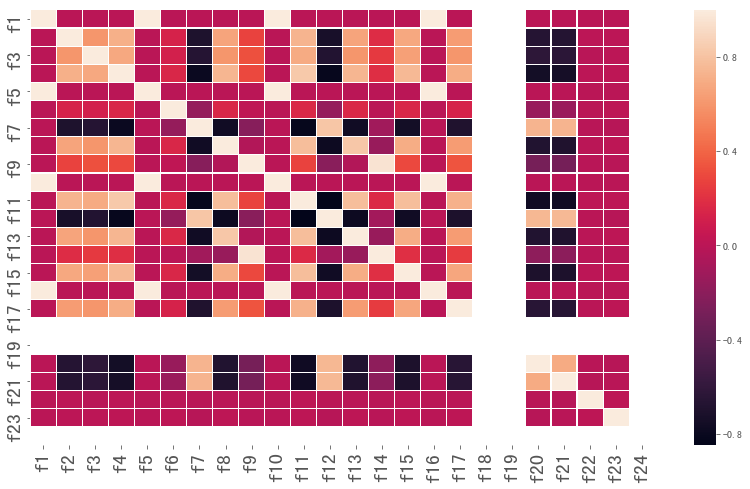

<Figure size 1440x1440 with 0 Axes>

In [294]:
import seaborn as sns

corr = temp.corr()
f, ax= plt.subplots(figsize = (14, 8))

plt.figure(figsize=(20,20))
ax.set_ylabel('Y Label',fontsize=23, color='r')
ax.tick_params(axis='y',labelsize=20) # y轴
ax.tick_params(axis='x',labelsize=20) # y轴
ax.xaxis.tick_top() # 将x轴刻度放置在top位置
# ax.legend(fontsize=20)

sns.heatmap(corr, linewidths = 0.1, ax = ax)
# sns.heatmap(corr)

